In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_excel("Random_leak_data_by_python_new.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-09-11 01:07:51.672,39.929400,10.621079,18424.053113,1.027891,22.903695,91.492707,0
1,2024-09-11 01:08:51.672,28.772791,12.583485,19349.045753,1.062183,23.669735,90.480759,0
2,2024-09-11 01:09:51.672,40.683585,10.373292,16836.128391,1.198044,22.882568,91.501099,0
3,2024-09-11 01:10:51.672,30.132450,7.311777,13157.137992,1.147510,23.649962,91.316517,1
4,2024-09-11 01:11:51.672,43.363561,22.374388,13531.753162,1.021209,23.724924,90.813242,0


In [5]:
df.shape    # 8 columns and 1000 rows

(1000, 8)

In [7]:
df.describe()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-09-11 09:27:21.672000,32.279212,15.098940,16985.253316,0.999864,23.080595,91.076086,0.258000
min,2024-09-11 01:07:51.672000,20.002799,5.000084,12008.290348,0.800623,22.344266,90.400441,0.000000
25%,2024-09-11 05:17:36.672000,25.645795,10.018130,14561.355364,0.900608,22.748368,90.717697,0.000000
50%,2024-09-11 09:27:21.672000,31.921272,15.172110,16807.068037,0.998330,23.083174,91.064813,0.000000
75%,2024-09-11 13:37:06.672000,38.703124,19.982058,19426.435195,1.104858,23.424764,91.415869,1.000000
max,2024-09-11 17:46:51.672000,44.986369,24.997440,21993.122800,1.199776,23.777052,91.814580,1.000000
std,NaN,7.381763,5.756182,2891.156689,0.117223,0.401001,0.404323,0.437753


In [9]:
# Split the data into features (X) and target variable (y)

X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']

In [11]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,39.929400,10.621079,18424.053113,1.027891
1,28.772791,12.583485,19349.045753,1.062183
2,40.683585,10.373292,16836.128391,1.198044
3,30.132450,7.311777,13157.137992,1.147510
4,43.363561,22.374388,13531.753162,1.021209


In [13]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Leak Condition, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Importing train_test_split function from sklearn library
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [17]:
X_train.shape

(800, 4)

In [19]:
X_test.shape

(200, 4)

In [21]:
from sklearn.preprocessing import MinMaxScaler                    # Importing MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()                                           # Initializing MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)                    # Scaling the training features using Min-Max scaling
X_test_scaled = scaler.fit_transform(X_test)                      # Scaling the testing features using Min-Max scaling

In [23]:
X_train_scaled

array([[0.86644992, 0.4360012 , 0.18844217, 0.59121496],
       [0.84313926, 0.09260726, 0.65462262, 0.0623835 ],
       [0.63440473, 0.68328105, 0.71504437, 0.13877925],
       ...,
       [0.39827878, 0.62740301, 0.87364972, 0.44882977],
       [0.46059965, 0.58472611, 0.28863769, 0.12982962],
       [0.00220662, 0.44523584, 0.60390752, 0.60050745]])

In [25]:
from keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [27]:
model = Sequential()
model.add(Dense(3, activation= 'sigmoid', input_dim = 4))
model.add(Dense(1, activation ='sigmoid'))

C:\Users\Apu Das\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [33]:
history= model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9572
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9023 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8878 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8385 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8185 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8005 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7729 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7583 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7363 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7189 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7023 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6884 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6762 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6619 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [36]:
history.history

{'loss': [0.6892032027244568,
  0.6696471571922302,
  0.6525330543518066,
  0.6389022469520569,
  0.6272586584091187,
  0.6178866028785706,
  0.6097346544265747,
  0.603258490562439,
  0.5976857542991638,
  0.593487024307251,
  0.5893241167068481,
  0.5863705277442932,
  0.5834829211235046,
  0.5810467004776001,
  0.5790231823921204,
  0.5773395299911499,
  0.5755962133407593,
  0.5741031765937805,
  0.5729257464408875,
  0.5714880228042603,
  0.5703327655792236,
  0.5691580176353455,
  0.5680915713310242,
  0.5670386552810669,
  0.5660145282745361,
  0.5650225877761841,
  0.5639009475708008,
  0.5628932118415833,
  0.5618976354598999,
  0.5608677268028259,
  0.5598594546318054,
  0.5588289499282837,
  0.557803750038147,
  0.5567470788955688,
  0.555750846862793,
  0.5546827912330627,
  0.5536084771156311,
  0.5525367856025696,
  0.5516538619995117,
  0.550383448600769,
  0.5492876768112183,
  0.5482021570205688,
  0.5470824241638184,
  0.5459809899330139,
  0.5448271632194519,
  0.543

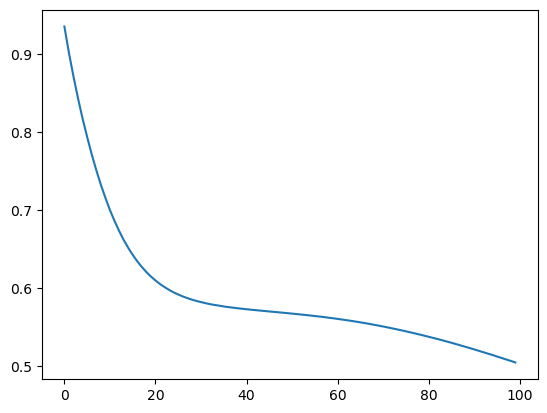

In [35]:
plt.plot(history.history['loss'])

In [37]:
model.layers[0].get_weights()

[array([[-0.61366624, -0.86420304,  0.8883112 ],
        [-0.97042567, -1.1609577 ,  1.9007603 ],
        [-0.07124759,  0.9148686 ,  0.07310727],
        [-0.00206654,  1.2564907 , -1.8574673 ]], dtype=float32),
 array([-0.35585493, -0.41945454,  0.16901144], dtype=float32)]

In [39]:
y_log = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [41]:
y_pred = np.where(y_log>0.5,1,0)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.765

# Accuracy is 76.5%

# Improving Accuracy

In [45]:
model = Sequential()

model.add(Dense(11, activation= 'relu', input_dim = 4))
model.add(Dense(11, activation= 'relu'))
model.add(Dense(1, activation ='sigmoid'))

# changing dense from 3 to 11
# changing activation function to relu

C:\Users\Apu Das\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7286 - loss: 0.6436 - val_accuracy: 0.7563 - val_loss: 0.6126
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.6096 - val_accuracy: 0.7563 - val_loss: 0.5798
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7270 - loss: 0.5834 - val_accuracy: 0.7563 - val_loss: 0.5467
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7563 - loss: 0.5390 - val_accuracy: 0.7563 - val_loss: 0.5159
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.5315 - val_accuracy: 0.7563 - val_loss: 0.4973
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.5194 - val_accuracy: 0.7563 - val_loss: 0.4800
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7442 - loss: 0.4836 - val_accuracy: 0.7563 - val_loss: 0.4671
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7506 - loss: 0.4751 - val_accuracy: 0

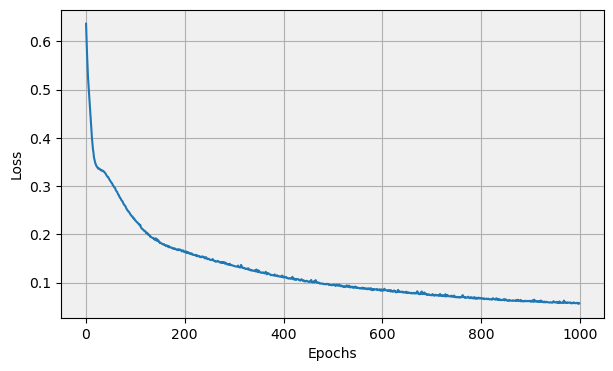

In [51]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['loss'])            # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Loss')                           # Labeling the y-axis as "Loss"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

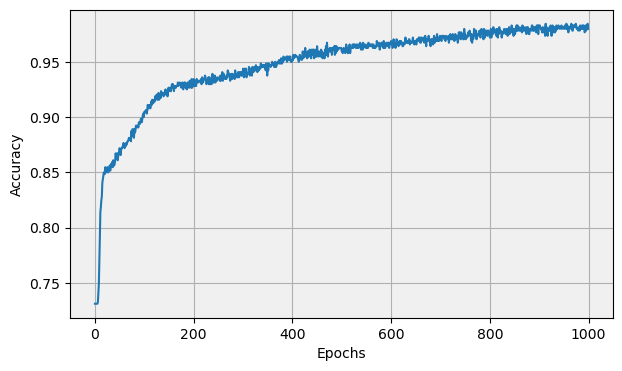

In [53]:

plt.figure(figsize=(7, 4))                      # Setting the size of the figure to 5x3
plt.plot(history.history['accuracy'])           # Plotting the training loss over epochs
plt.xlabel('Epochs')                            # Labeling the x-axis as "Epochs"
plt.ylabel('Accuracy')                          # Labeling the y-axis as "Accuracy"

plt.gca().set_facecolor('#f0f0f0')              # Setting background color to light gray
plt.grid(True)                                  # Displaying grid lines

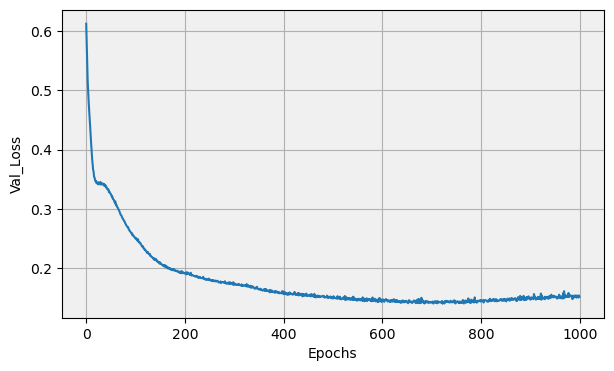

In [55]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['val_loss'])        # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Val_Loss')                       # Labeling the y-axis as "Val_Loss"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

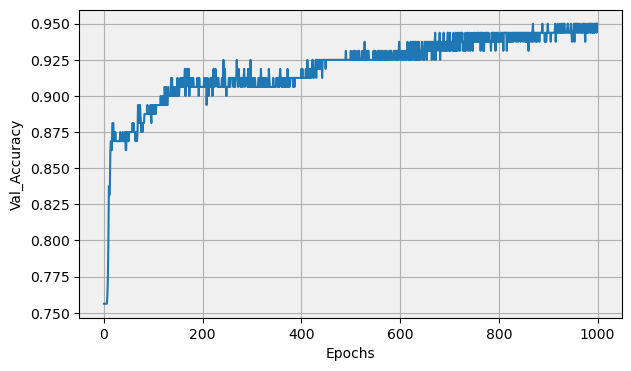

In [57]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['val_accuracy'])    # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Val_Accuracy')                   # Labeling the y-axis as "Val_Accuracy"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

In [59]:
model.layers[0].get_weights()

[array([[ 0.06139174, -0.20860936,  1.4066534 ,  0.8211199 , -0.08704987,
          0.14530148,  1.7288883 ,  1.852127  , -0.04143571, -0.60333234,
          0.30396426],
        [ 0.95789933, -0.3987708 , -1.4175907 ,  0.05538614,  0.06630822,
          0.00535182, -0.25061435, -0.15940183,  0.43932068,  0.3671421 ,
          0.31784874],
        [ 0.09066289, -0.6577694 ,  0.1575153 , -0.4916228 ,  0.96040803,
          0.01912379,  0.0459309 ,  0.21227185, -0.06276143,  0.4974939 ,
         -0.4831046 ],
        [-0.07277147,  0.64809716, -0.15816788, -0.16230969, -0.7836295 ,
         -1.5508269 , -0.1181491 ,  0.31412268,  1.1872923 ,  0.8352409 ,
          0.91761696]], dtype=float32),
 array([ 0.00195139,  0.39557576,  0.14584723,  0.34568867, -0.26335272,
         0.82483166, -0.02994573, -0.41818196,  0.06975825,  0.38599288,
         0.31389493], dtype=float32)]

In [66]:
model.layers[1].get_weights()

[array([[ 3.95650864e-01,  6.38253927e-01, -2.38082576e+00,
         -1.42178440e+00,  2.27544323e-01, -3.24236095e-01,
          5.78024268e-01,  1.38767779e-01,  6.15411639e-01,
          1.12681553e-01, -2.80795574e-01],
        [ 1.21302046e-01, -3.70672345e-01, -2.94082284e+00,
          1.76490247e+00,  1.34779620e+00,  7.19064653e-01,
         -2.67877460e-01,  3.83195430e-01, -1.01464045e+00,
          1.98839217e-01,  1.18347538e+00],
        [-8.76994312e-01,  4.22480136e-01,  4.76593301e-02,
         -2.79275566e-01,  2.97697932e-01, -7.04424500e-01,
          1.04710840e-01,  9.12039205e-02,  6.79962695e-01,
         -9.04726624e-01, -6.53875232e-01],
        [ 9.14053768e-02,  1.09484768e+00, -1.12600756e+00,
         -1.25988269e+00,  4.86849755e-01, -2.58047789e-01,
          1.05106950e+00, -3.54227185e-01,  8.87733936e-01,
          4.58029121e-01, -7.09904134e-01],
        [ 5.99629469e-02, -1.24717069e+00, -3.09139550e-01,
          1.71455097e+00,  1.16721666e+00,  

In [61]:
model.layers[2].get_weights()

[array([[-2.2705085],
        [ 3.8405664],
        [ 0.6205373],
        [ 1.8049364],
        [-0.5976647],
        [-0.5633497],
        [ 2.9616623],
        [-2.1680808],
        [ 2.3948529],
        [-1.9744188],
        [-1.7971078]], dtype=float32),
 array([0.07897712], dtype=float32)]

In [63]:
y_log = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [65]:
y_pred = np.where(y_log>0.5,1,0)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.955

# Accuracy is 95.5%


# Confusion Matrix

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


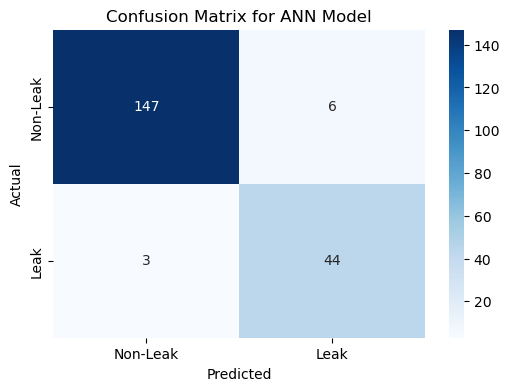

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the test data
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Generate confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Leak', 'Leak'], yticklabels=['Non-Leak', 'Leak'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for ANN Model')
plt.show()


# ROC Curve (Receiver Operating Characteristic)

The ROC curve gives a graphical representation of the model’s performance by comparing the True Positive Rate (TPR) and False Positive Rate (FPR)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


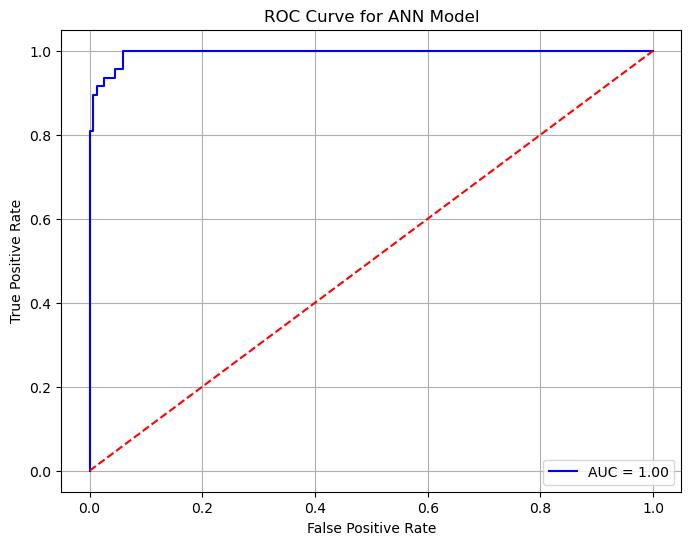

In [76]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_prob = model.predict(X_test_scaled).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for ANN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Precision-Recall Curve

This curve gives an idea of the tradeoff between precision and recall for different threshold values.

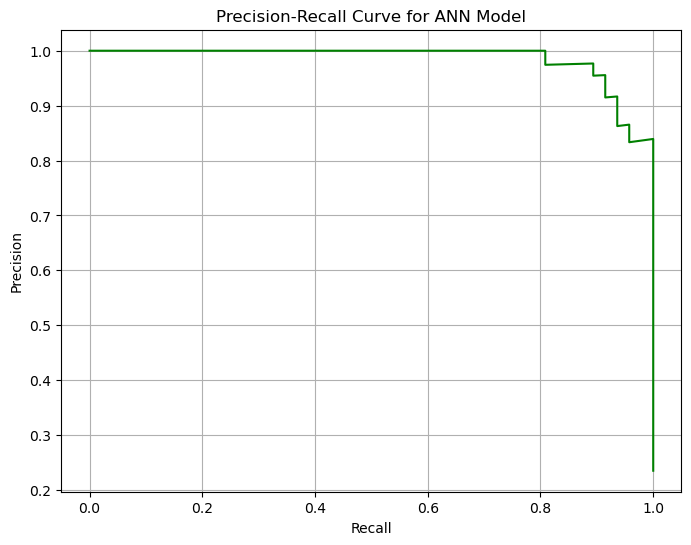

In [79]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Curve for ANN Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


# The Architecture of ANN model

In [88]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


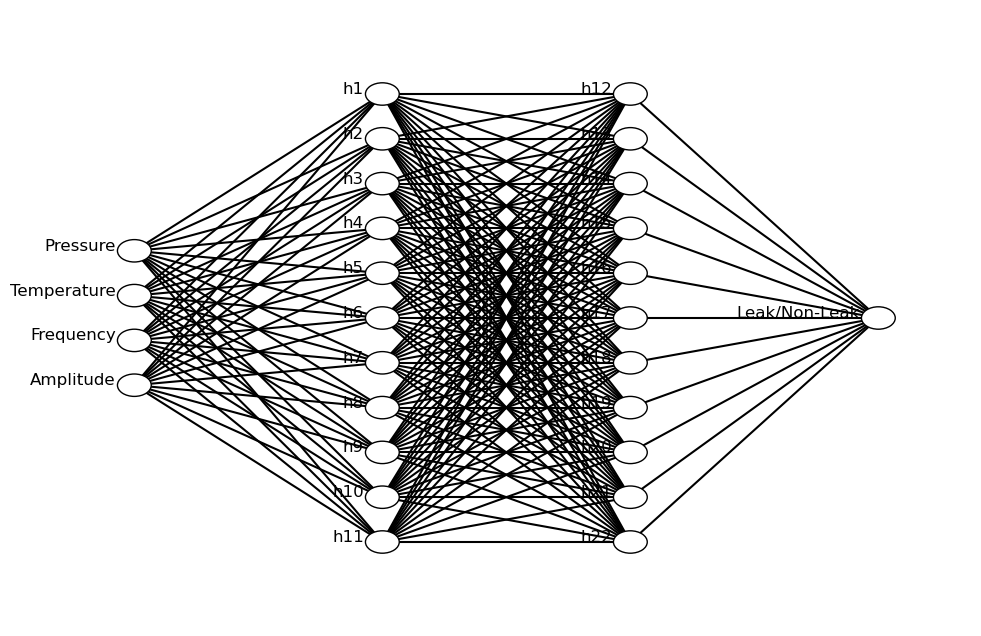

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Function to draw a labeled layer of neurons
def draw_neural_net(ax, left, right, bottom, top, layer_sizes, labels=None):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes in each layer
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            
            # Add labels to neurons
            if labels and labels[n]:
                ax.text(n * h_spacing + left - 0.02, layer_top - m * v_spacing, f'{labels[n][m]}',
                        fontsize=12, ha='right', zorder=5)

    # Connect nodes between layers
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)

# Define the layer sizes based on ANN structure
layer_sizes = [4, 11, 11, 1]  # 4 input features, 2 hidden layers with 11 neurons each, 1 output layer

# Define labels for each layer (inputs, hidden layers, output)
labels = [
    ['Pressure', 'Temperature', 'Frequency', 'Amplitude'],   # Input layer (features)
    ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11'],  # First hidden layer
    ['h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22'],  # Second hidden layer
    ['Leak/Non-Leak']  # Output layer
]

# Plotting the neural network
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.axis('off')

# Draw the ANN diagram with labels
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, labels)
plt.show()


# Testing the model with sample pressure, temperature, frequency and amplitude value at a certain point of gas pipeline

In [137]:
import numpy as np

# Sample values for Pressure, Temperature, Frequency, Amplitude
sample_values = np.array([[12, 2.2, 22000, 1.9]]) 

# Scale the sample values using the same scaler
sample_values_scaled = scaler.transform(sample_values)

# Predict using the existing ANN model
prediction = model.predict(sample_values_scaled)

# Convert the prediction to binary output (0 or 1)
leak_status = 'Leak' if prediction[0][0] > 0.5 else 'Non-Leak'

print(f'Prediction: {leak_status}')


C:\Users\Apu Das\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
Prediction: Leak


In [139]:
import numpy as np

# Sample values for Pressure, Temperature, Frequency, Amplitude
sample_values = np.array([[40, 12.2, 18000, 1.1]]) 

# Scale the sample values using the same scaler
sample_values_scaled = scaler.transform(sample_values)

# Predict using the existing ANN model
prediction = model.predict(sample_values_scaled)

# Convert the prediction to binary output (0 or 1)
leak_status = 'Leak' if prediction[0][0] > 0.5 else 'Non-Leak'

print(f'Prediction: {leak_status}')


C:\Users\Apu Das\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Prediction: Non-Leak
